In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline

In [ ]:
df_test = pd.read_csv("mnist_test.csv")
df_train = pd.read_csv("mnist_train.csv")
df_test.head()
df = pd.concat([df_test, df_train])


In [ ]:
df.shape

(70000, 785)

In [ ]:
df_x = df.iloc[:,1:]
df_y = df.iloc[:,-1]
df_y.value_counts()

0    63124
1     6876
Name: target6, dtype: int64

In [ ]:
df.columns

Index(['label', '1x1', '1x2', '1x3', '1x4', '1x5', '1x6', '1x7', '1x8', '1x9',
       ...
       '28x20', '28x21', '28x22', '28x23', '28x24', '28x25', '28x26', '28x27',
       '28x28', 'target6'],
      dtype='object', length=786)

In [ ]:
df["target6"] = np.where(df['label']== 6 ,1,0)
df.target6.value_counts()

0    63124
1     6876
Name: target6, dtype: int64

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(df_x, df_y, test_size=0.2, random_state=4,stratify =df_y )

In [ ]:
y_train.shape

(56000,)

In [ ]:
y_test.shape

(14000,)

In [ ]:
y_train.value_counts(normalize=True)

0    0.901768
1    0.098232
Name: target6, dtype: float64

In [ ]:
y_test.value_counts(normalize=True)

0    0.901786
1    0.098214
Name: target6, dtype: float64

In [ ]:
df_train.shape

(60000, 785)

In [ ]:
df_train.describe()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,1x10,1x11,1x12,1x13,1x14,1x15,1x16,1x17,1x18,1x19,1x20,1x21,1x22,1x23,1x24,1x25,1x26,1x27,1x28,2x1,2x2,2x3,2x4,2x5,2x6,2x7,2x8,2x9,2x10,2x11,...,27x17,27x18,27x19,27x20,27x21,27x22,27x23,27x24,27x25,27x26,27x27,27x28,28x1,28x2,28x3,28x4,28x5,28x6,28x7,28x8,28x9,28x10,28x11,28x12,28x13,28x14,28x15,28x16,28x17,28x18,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
count,60000.000000,60000.0,60000.0,60000.0,60000.0,60000.0,60000.0,60000.0,60000.0,60000.0,60000.0,60000.0,60000.0,60000.000000,60000.000000,60000.000000,60000.000000,60000.0,60000.0,60000.0,60000.0,60000.0,60000.0,60000.0,60000.0,60000.0,60000.0,60000.0,60000.0,60000.0,60000.0,60000.0,60000.0,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.00000,60000.000000,...,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.0,60000.0,60000.0,60000.0,60000.0,60000.0,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.0000,60000.0,60000.0,60000.0,60000.0
mean,4.453933,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.002100,0.007833,0.003600,0.000150,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000267,0.000917,0.009283,0.024283,0.043717,0.06410,0.120133,...,3.534933,2.591817,1.701167,1.008600,0.540283,0.238400,0.075267,0.016167,0.000517,0.000983,0.0,0.0,0.0,0.0,0.0,0.0,0.002533,0.015583,0.041633,0.089200,0.128217,0.196733,0.336017,0.429967,0.525983,0.590683,0.688033,0.592067,0.482733,0.343517,0.200433,0.088867,0.045633,0.019283,0.015117,0.0020,0.0,0.0,0.0,0.0
std,2.889270,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.475324,1.361189,0.881816,0.036742,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.065320,0.194636,1.055011,2.095113,2.962063,3.32388,4.869298,...,26.101169,22.251302,18.107058,13.897102,10.317854,6.552565,3.500306,1.241759,0.114964,0.240866,0.0,0.0,0.0,0.0,0.0,0.0,0.437527,1.721198,2.601220,4.032627,4.776047,6.177880,7.680724,9.093559,9.898373,10.431982,11.403013,10.517303,9.397896,8.057733,6.042472,3.956189,2.839845,1.686770,1.678283,0.3466,0.0,0.0,0.0,0.0
min,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.0,0.0,0.0,0.0
25%,2.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.0,0.0,0.0,0.0
50%,4.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.0,0.0,0.0,0.0
75%,7.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0

In [ ]:
#descision tree
dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
dt.score(x_test,y_test)

1.0

In [ ]:
dt.score(x_train,y_train)

1.0

In [ ]:
#Random Forest - Ensemble of Descision Trees

rf = RandomForestClassifier(n_estimators=20,n_jobs = -1)
rf.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=20, n_jobs=-1,
                       oob_score=False, random_state=None, verbose=0,
                       warm_start=False)

In [ ]:
rf.score(x_test,y_test)

0.9977142857142857

In [ ]:
rf.score(x_train,y_train)

1.0

In [ ]:
y_pred = rf.predict(x_test)

In [ ]:
y_prob = rf.predict_proba(x_test)[:,1]

In [ ]:
y_eval = pd.merge(pd.merge(pd.DataFrame(y_pred).set_index(y_test.index),pd.DataFrame(y_prob).set_index(y_test.index),left_index=True,right_index=True),y_test,left_index=True,right_index=True)
y_eval.rename(columns={'0_x':'prediction','0_y':'prob'},inplace=True)


In [ ]:
y_eval['decile'] = pd.qcut(y_eval['prob'].rank(method = 'first'),10 ,labels =[0,1,2,3,4,5,6,7,8,9] ,retbins= False)

In [ ]:
y_eval.groupby(['decile'])['target6'].agg(['sum','count','mean'])

,sum,count,mean
decile,,,
0,36,1636,0.022005
1,36,1636,0.022005
2,40,1636,0.024450
3,6,1635,0.003670
4,0,1636,0.000000
5,0,1636,0.000000
6,0,1635,0.000000
7,0,1636,0.000000
8,21,1636,0.012836


In [ ]:
y_eval[(y_eval['decile']==0) & (y_eval['target6']==1)]

,prediction,prob,target6,decile
155,0,0.0,1,0
155,1,0.0,1,0
600,0,0.0,1,0
600,1,0.0,1,0
1035,1,0.0,1,0
1035,0,0.0,1,0
1139,0,0.0,1,0
1139,1,0.0,1,0
1852,1,0.0,1,0
1852,0,0.0,1,0


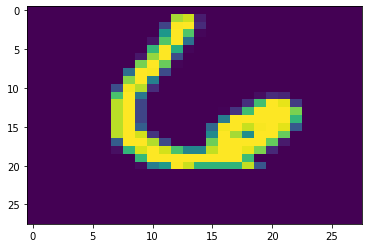

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
my_image = np.array(df.iloc[1035].drop(['label','target6'])).reshape([28,28])
import matplotlib.pyplot as plt


plt.imshow(my_image,aspect="auto")
plt.show()

In [ ]:
pd.DataFrame(y_pred).set_index(y_test.index)

,0
12922,0
3969,0
1999,0
30894,0
27351,0
...,...
45543,0
3867,0
17154,0
47976,0


In [ ]:
y_test

12922    0
3969     0
1999     0
30894    0
27351    0
        ..
45543    0
3867     0
17154    0
47976    0
54695    0
Name: target6, Length: 14000, dtype: int64

In [ ]:
#Bagging 
# difference between bagging and boosting 
bg = BaggingClassifier(DecisionTreeClassifier(), max_samples= 0.5, max_features = 1.0, n_estimators = 20)
bg.fit(x_train,y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                        class_weight=None,
                                                        criterion='gini',
                                                        max_depth=None,
                                                        max_features=None,
                                                        max_leaf_nodes=None,
                                                        min_impurity_decrease=0.0,
                                                        min_impurity_split=None,
                                                        min_samples_leaf=1,
                                                        min_samples_split=2,
                                                        min_weight_fraction_leaf=0.0,
                                                        presort='deprecated',
                                                        random_state=None,


In [ ]:
bg.score(x_test,y_test)

0.9484285714285714

In [ ]:
bg.score(x_train,y_train)

0.9939107142857143

In [ ]:
#Boosting - Ada Boost

adb = AdaBoostClassifier(DecisionTreeClassifier(),n_estimators = 5, learning_rate = 1)
adb.fit(x_train,y_train)

AdaBoostClassifier(algorithm='SAMME.R',
                   base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                         class_weight=None,
                                                         criterion='gini',
                                                         max_depth=None,
                                                         max_features=None,
                                                         max_leaf_nodes=None,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=1,
                                                         min_samples_split=2,
                                                         min_weight_fraction_leaf=0.0,
                                                         presort='deprecated',
                       

In [ ]:
adb.score(x_test,y_test)

0.8743571428571428

In [ ]:
adb.score(x_train,y_train)

1.0

In [ ]:
# Voting Classifier - Multiple Model Ensemble 

lr = LogisticRegression()
dt = DecisionTreeClassifier()
svm = SVC(kernel = 'poly', degree = 2 )

In [ ]:
evc = VotingClassifier( estimators= [('lr',lr),('dt',dt),('svm',svm)], voting = 'hard')

In [ ]:
evc.fit(x_train.iloc[1:4000],y_train.iloc[1:4000])

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


VotingClassifier(estimators=[('lr',
                              LogisticRegression(C=1.0, class_weight=None,
                                                 dual=False, fit_intercept=True,
                                                 intercept_scaling=1,
                                                 l1_ratio=None, max_iter=100,
                                                 multi_class='auto',
                                                 n_jobs=None, penalty='l2',
                                                 random_state=None,
                                                 solver='lbfgs', tol=0.0001,
                                                 verbose=0, warm_start=False)),
                             ('dt',
                              DecisionTreeClassifier(ccp_alpha=0.0,
                                                     class_weight=None,
                                                     criterion='gini',...
                                        

In [ ]:
evc.score(x_test, y_test)

0.9129285714285714